Información sobre las personas servidoras públicas cuyo puesto está en la nómina del gobierno de la Ciudad de México y es usada para la sección de Remuneraciones al Personal del Gobierno de la Ciudad de México en el portal de Tu Ciudad, Tu Dinero

Si deseas consultar la información histórica de la base de datos Remuneraciones al Personal de la Ciudad de México da click en este enlace.

Si quieres consultar las bases de datos históricas de las remuneraciones de las personas servidoras públicas con la variable de género y edad consulta la información

In [58]:
#De ley
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#entrenar modelo
from sklearn.model_selection import train_test_split
# reescalar variables 
from sklearn.preprocessing import MinMaxScaler
# RFE y modelo de Regresion Lineal
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RiemanNClav/Remunericaciones-Personal-de-la-CDMX/master/remuneracion.csv',
                 encoding='latin-1')

#https://github.com/RiemanNClav/Remunericaciones-Personal-de-la-CDMX

In [3]:
df.head(5)

,nombre,apellido_1,apellido_2,sexo,edad,n_puesto,id_tipo_nomina,tipo_contratacion,tipo_personal,id_universo,n_universo,id_sector,n_cabeza_sector,id_nivel_salarial,sueldo_tabular_bruto,sueldo_tabular_neto
0,MAYELA MARIANA,DORANTES,GUILLEN,FEMENINO,23,ADMINISTRATIVO ESPECIALIZADO L,1,BASE,BASE NO SINDICALIZADO,O,TECNICO OPERATIVO,02CD03,ALCALDIA DE BENITO JUAREZ,199,15375.0,13755.02
1,CARLOS URIEL,PEREZ,ORTEGA,MASCULINO,23,AUXILIAR DE SERVICIOS,1,BASE,BASE NO SINDICALIZADO,O,TECNICO OPERATIVO,02CD06,ALCALDIA DE CUAUHTEMOC,89,6874.0,6696.75
2,ENRIQUE,RAMIREZ,MARQUEZ,MASCULINO,21,AUXILIAR DE SERVICIOS,1,BASE,SINDICALIZADOS,O,TECNICO OPERATIVO,02CD07,ALCALDIA DE GUSTAVO A. MADERO,89,7841.0,7305.00
3,MONTSERRAT ALEJANDRA,SANDOVAL,PEREA,FEMENINO,27,APOYO ADMTVO EN AREAS ESPECIFICAS A,1,BASE,SINDICALIZADOS,O,TECNICO OPERATIVO,02CD15,ALCALDIA DE VENUSTIANO CARRANZA,89,7841.0,7305.00
4,FRANCISCO XAVIER,GONZALEZ,CARMONA,MASCULINO,23,BOMBERO,4,HABERES,HABERES,O,TECNICO OPERATIVO,34PDHB,HEROICO CUERPO DE BOMBEROS DEL D. F.,81,15851.0,14133.22


In [4]:
df.isnull().sum()

nombre                    0
apellido_1              513
apellido_2              820
sexo                      1
edad                      0
n_puesto                  0
id_tipo_nomina            0
tipo_contratacion         0
tipo_personal             0
id_universo               0
n_universo                0
id_sector                 0
n_cabeza_sector           0
id_nivel_salarial         0
sueldo_tabular_bruto      0
sueldo_tabular_neto       0
dtype: int64

In [5]:
df["apellido_1"].replace({None : ''}, inplace=True)
df["apellido_2"].replace({None : ''}, inplace=True)

In [6]:
df['nombre_completo'] = df['nombre'].map(str) + ' ' + df['apellido_1'].map(str)+ ' ' + df['apellido_2'].map(str)

In [7]:
df = df.drop(['nombre','apellido_1','apellido_2'],axis = 1)

In [8]:
df = df[~df['sexo'].isnull()]

C:\Users\XMX5634\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


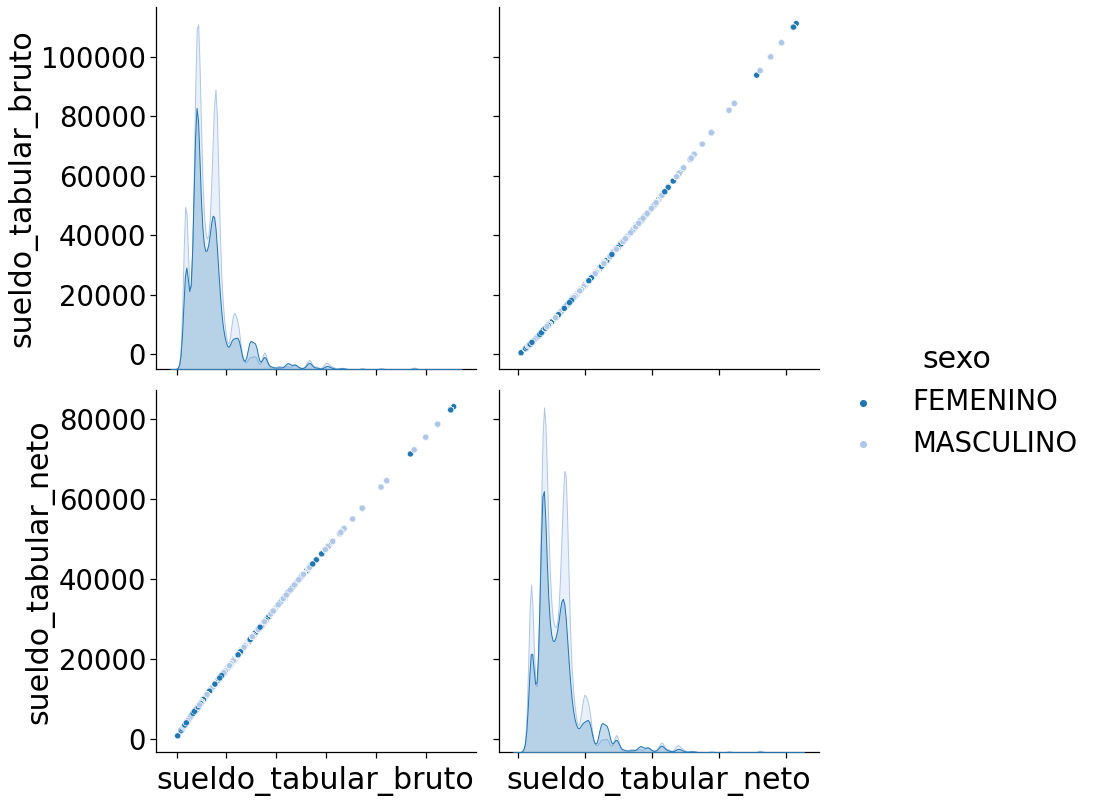

In [9]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sueldo_tabular_bruto','sueldo_tabular_neto','sexo']],hue='sexo',palette='tab20',size =6)
g.set(xticklabels=[]);

<AxesSubplot:xlabel='tipo_contratacion', ylabel='count'>

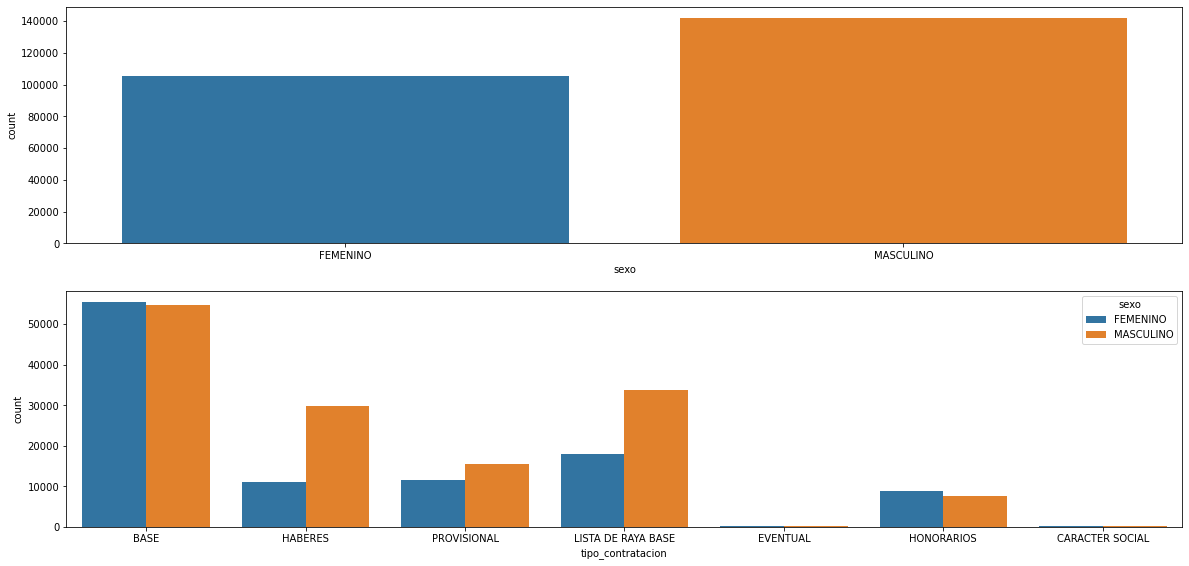

In [10]:
plt.figure(figsize = [20,20])
#4 graficos para cada una de las siguiente variables. 
plt.subplot(411)
sns.countplot(x = 'sexo', data = df)
plt.subplot(412)
sns.countplot(x = 'tipo_contratacion', hue = 'sexo', data = df)

<AxesSubplot:xlabel='sueldo_tabular_bruto', ylabel='sexo'>

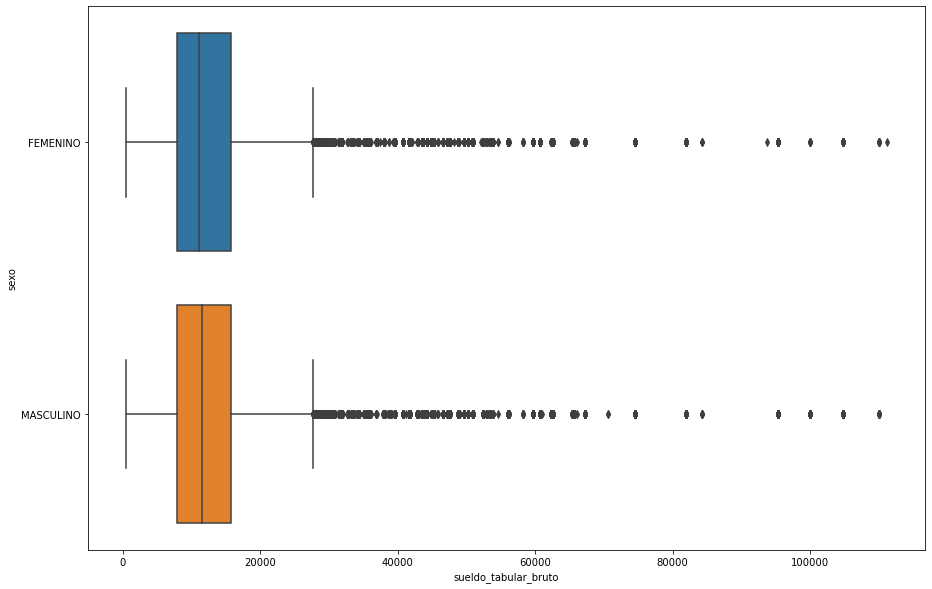

In [11]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'sueldo_tabular_bruto', y  ='sexo', data = df)

<AxesSubplot:xlabel='sueldo_tabular_bruto', ylabel='tipo_contratacion'>

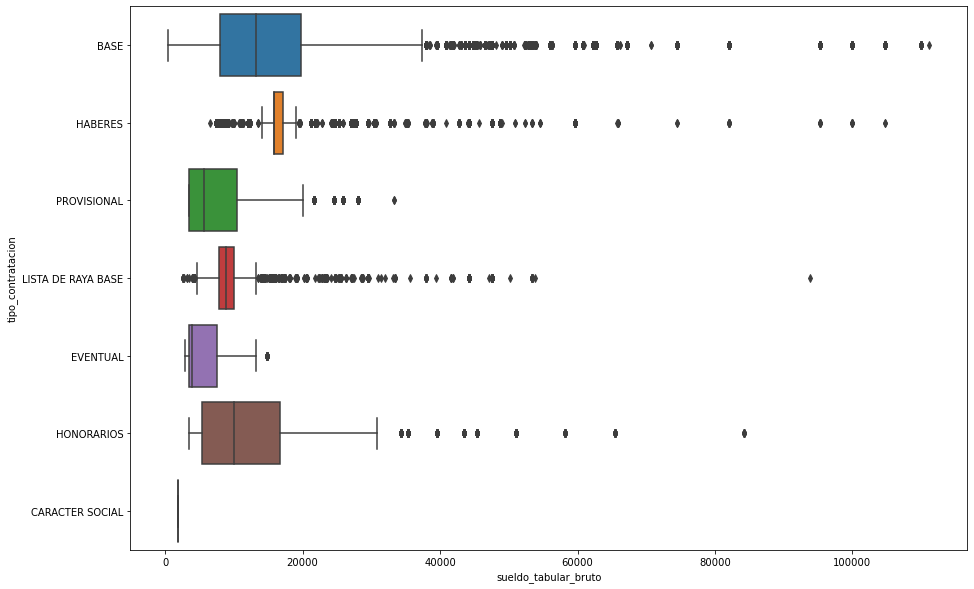

In [12]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'sueldo_tabular_bruto', y  ='tipo_contratacion', data = df)

In [13]:
def variables(df, tipo='categorica'):
    dicc = {'categorica':'object','num_int':'int64','num_float':'float64'}
    varbls = []
    var=0
    for col in df.columns:
        variable = df[[col]].dtypes[0]
        if str(variable) == dicc[tipo]:
            varbls.append(col)
            var += 1
    return varbls,var
 

In [14]:
df['sexo'] = df['sexo'].apply(lambda x: 1 if x == 'MASCULINO' else 0)

In [15]:
categoricas,n = variables(df,'categorica')

dicc = {}
for categorica in categoricas:
    dicc[categorica + '_len'] = len(df[categorica].unique())

In [16]:
dicc

{'n_puesto_len': 1755,
 'tipo_contratacion_len': 7,
 'tipo_personal_len': 11,
 'id_universo_len': 26,
 'n_universo_len': 26,
 'id_sector_len': 73,
 'n_cabeza_sector_len': 73,
 'nombre_completo_len': 243834}

In [17]:
df = df[['edad','tipo_contratacion','tipo_personal','n_cabeza_sector','sueldo_tabular_bruto','sueldo_tabular_neto']]

In [18]:
df

,edad,tipo_contratacion,tipo_personal,n_cabeza_sector,sueldo_tabular_bruto,sueldo_tabular_neto
0,23,BASE,BASE NO SINDICALIZADO,ALCALDIA DE BENITO JUAREZ,15375.0,13755.02
1,23,BASE,BASE NO SINDICALIZADO,ALCALDIA DE CUAUHTEMOC,6874.0,6696.75
2,21,BASE,SINDICALIZADOS,ALCALDIA DE GUSTAVO A. MADERO,7841.0,7305.00
3,27,BASE,SINDICALIZADOS,ALCALDIA DE VENUSTIANO CARRANZA,7841.0,7305.00
4,23,HABERES,HABERES,HEROICO CUERPO DE BOMBEROS DEL D. F.,15851.0,14133.22
...,...,...,...,...,...,...
247292,69,LISTA DE RAYA BASE,SINDICALIZADOS,PLANTA PRODUCTORA DE MEZCLAS ASFALTICAS,15375.0,13755.02
247293,48,BASE,BASE NO SINDICALIZADO,SECRETARIA DEL MEDIO AMBIENTE DE LA CDMX,4612.0,4704.49
247294,36,LISTA DE RAYA BASE,SINDICALIZADOS,ALCALDIA DE ALVARO OBREGON,4042.0,4199.20
247295,69,LISTA DE RAYA BASE,LISTA DE RAYA NO SINDICALIZADO,SECRETARIA DEL MEDIO AMBIENTE DE LA CDMX,3871.0,4039.14


In [19]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [20]:
df_dummies

,edad,sueldo_tabular_bruto,sueldo_tabular_neto,tipo_contratacion_CARACTER SOCIAL,tipo_contratacion_EVENTUAL,tipo_contratacion_HABERES,tipo_contratacion_HONORARIOS,tipo_contratacion_LISTA DE RAYA BASE,tipo_contratacion_PROVISIONAL,tipo_personal_CARACTER SOCIAL,...,n_cabeza_sector_SECRETARIA DE PUEBLOS Y BARRIOS ORIGINARIOS Y COMUNIDADES INDIGENAS RESIDENTES DE LA CDMX,n_cabeza_sector_SECRETARIA DE SALUD DE LA CDMX,n_cabeza_sector_SECRETARIA DE SEGURIDAD CIUDADANA DE LA CDMX,n_cabeza_sector_SECRETARIA DE TRABAJO Y FOMENTO AL EMPLEO EN LA CDMX,n_cabeza_sector_SECRETARIA DE TURISMO DE LA CDMX,n_cabeza_sector_SECRETARIA DEL MEDIO AMBIENTE DE LA CDMX,n_cabeza_sector_SERVICIO DE MEDIOS PUBLICOS DE LA CIUDAD DE MEXICO,n_cabeza_sector_SISTEMA DE AGUAS DE LA CIUDAD DE MEXICO,n_cabeza_sector_UNIVERSIDAD DE LA POLICIA DE LA CIUDAD DE MEXICO,n_cabeza_sector_UNIVERSIDAD DE LA SALUD
0,23,15375.0,13755.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,6874.0,6696.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,7841.0,7305.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,7841.0,7305.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,15851.0,14133.22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247292,69,15375.0,13755.02,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
247293,48,4612.0,4704.49,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
247294,36,4042.0,4199.20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
247295,69,3871.0,4039.14,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Reescalar Variables

In [21]:
scaler = MinMaxScaler()

In [22]:
num_vars = ['edad','sueldo_tabular_bruto','sueldo_tabular_neto']
df_dummies[num_vars] = scaler.fit_transform(df_dummies[num_vars])

# Division del data set

In [23]:
X = df_dummies.drop(['sueldo_tabular_neto'],axis = 1)
Y = df_dummies[['sueldo_tabular_neto']]

In [24]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 0)

# RFE 
Recursive Feature Elimination

In [25]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, Y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('edad', False, 43),
 ('sueldo_tabular_bruto', True, 1),
 ('tipo_contratacion_CARACTER SOCIAL', True, 1),
 ('tipo_contratacion_EVENTUAL', True, 1),
 ('tipo_contratacion_HABERES', False, 46),
 ('tipo_contratacion_HONORARIOS', True, 1),
 ('tipo_contratacion_LISTA DE RAYA BASE', False, 44),
 ('tipo_contratacion_PROVISIONAL', True, 1),
 ('tipo_personal_CARACTER SOCIAL', True, 1),
 ('tipo_personal_CONFIANZA', False, 8),
 ('tipo_personal_ESTABILIDAD LABORAL', True, 1),
 ('tipo_personal_ESTRUCTURA', False, 4),
 ('tipo_personal_EVENTUALES', True, 1),
 ('tipo_personal_HABERES', False, 5),
 ('tipo_personal_HONORARIOS', True, 1),
 ('tipo_personal_INTERINATO', False, 10),
 ('tipo_personal_LISTA DE RAYA NO SINDICALIZADO', False, 12),
 ('tipo_personal_SINDICALIZADOS', False, 9),
 ('n_cabeza_sector_AGENCIA DIGITAL DE INNOVACION PUBLICA', False, 33),
 ('n_cabeza_sector_ALCALDIA DE ALVARO OBREGON', True, 1),
 ('n_cabeza_sector_ALCALDIA DE AZCAPOTZALCO', True, 1),
 ('n_cabeza_sector_ALCALDIA DE BENITO 

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['sueldo_tabular_bruto', 'tipo_contratacion_CARACTER SOCIAL',
       'tipo_contratacion_EVENTUAL', 'tipo_contratacion_HONORARIOS',
       'tipo_contratacion_PROVISIONAL', 'tipo_personal_CARACTER SOCIAL',
       'tipo_personal_ESTABILIDAD LABORAL', 'tipo_personal_EVENTUALES',
       'tipo_personal_HONORARIOS',
       'n_cabeza_sector_ALCALDIA DE ALVARO OBREGON',
       'n_cabeza_sector_ALCALDIA DE AZCAPOTZALCO',
       'n_cabeza_sector_ALCALDIA DE BENITO JUAREZ',
       'n_cabeza_sector_ALCALDIA DE COYOACAN',
       'n_cabeza_sector_ALCALDIA DE CUAJIMALPA DE MORELOS',
       'n_cabeza_sector_ALCALDIA DE CUAUHTEMOC',
       'n_cabeza_sector_ALCALDIA DE GUSTAVO A. MADERO',
       'n_cabeza_sector_ALCALDIA DE IZTACALCO',
       'n_cabeza_sector_ALCALDIA DE IZTAPALAPA',
       'n_cabeza_sector_ALCALDIA DE LA MAGDALENA CONTRERAS',
       'n_cabeza_sector_ALCALDIA DE MIGUEL HIDALGO',
       'n_cabeza_sector_ALCALDIA DE MILPA ALTA',
       'n_cabeza_sector_ALCALDIA DE TLAHUAC',
       'n

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'¶

## Model 1

## VIF Check

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

C:\Users\XMX5634\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(Y_train, X_train_lm1).fit()

C:\Users\XMX5634\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
lr1.params

const                                                                                                        0.015149
sueldo_tabular_bruto                                                                                         1.046312
tipo_contratacion_CARACTER SOCIAL                                                                           -0.006110
tipo_contratacion_EVENTUAL                                                                                  -0.001590
tipo_contratacion_HONORARIOS                                                                                -0.000517
tipo_contratacion_PROVISIONAL                                                                               -0.001348
tipo_personal_CARACTER SOCIAL                                                                               -0.006110
tipo_personal_ESTABILIDAD LABORAL                                                                           -0.001348
tipo_personal_EVENTUALES                                

In [32]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                             OLS Regression Results                            
Dep. Variable:     sueldo_tabular_neto   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 4.018e+06
Date:                 Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:16:03   Log-Likelihood:             8.4946e+05
No. Observations:               197836   AIC:                        -1.699e+06
Df Residuals:                   197794   BIC:                        -1.698e+06
Df Model:                           41                                         
Covariance Type:             nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Model 2

In [33]:
cols_drop = ['tipo_contratacion_EVENTUAL','tipo_contratacion_HONORARIOS','tipo_contratacion_PROVISIONAL',
 'tipo_personal_CARACTER SOCIAL','tipo_personal_ESTABILIDAD LABORAL','tipo_personal_EVENTUALES',
 'tipo_personal_HONORARIOS','tipo_contratacion_CARACTER SOCIAL']

In [34]:
X_train_rfe = X_train_rfe.drop(cols_drop,axis = 1)

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sueldo_tabular_bruto,1.22
26,n_cabeza_sector_SECRETARIA DE ADMINISTRACION Y...,1.03
35,n_cabeza_sector_SISTEMA DE AGUAS DE LA CIUDAD ...,1.02
11,n_cabeza_sector_ALCALDIA DE MIGUEL HIDALGO,1.01
29,n_cabeza_sector_SECRETARIA DE MOVILIDAD DE LA ...,1.01
30,n_cabeza_sector_SECRETARIA DE OBRAS Y SERVICIO...,1.01
1,n_cabeza_sector_ALCALDIA DE ALVARO OBREGON,1.01
16,n_cabeza_sector_ALCALDIA DE XOCHIMILCO,1.01
15,n_cabeza_sector_ALCALDIA DE VENUSTIANO CARRANZA,1.01
14,n_cabeza_sector_ALCALDIA DE TLALPAN,1.01


In [36]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(Y_train, X_train_lm2).fit()

C:\Users\XMX5634\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
lr2.params

const                                                                                                        0.014489
sueldo_tabular_bruto                                                                                         1.048702
n_cabeza_sector_ALCALDIA DE ALVARO OBREGON                                                                  -0.004994
n_cabeza_sector_ALCALDIA DE AZCAPOTZALCO                                                                    -0.004775
n_cabeza_sector_ALCALDIA DE BENITO JUAREZ                                                                   -0.004001
n_cabeza_sector_ALCALDIA DE COYOACAN                                                                        -0.004972
n_cabeza_sector_ALCALDIA DE CUAJIMALPA DE MORELOS                                                           -0.004332
n_cabeza_sector_ALCALDIA DE CUAUHTEMOC                                                                      -0.004305
n_cabeza_sector_ALCALDIA DE GUSTAVO A. MADERO           

In [38]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                             OLS Regression Results                            
Dep. Variable:     sueldo_tabular_neto   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 4.128e+06
Date:                 Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:16:23   Log-Likelihood:             8.4196e+05
No. Observations:               197836   AIC:                        -1.684e+06
Df Residuals:                   197798   BIC:                        -1.683e+06
Df Model:                           37                                         
Covariance Type:             nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Model 3 

* A pesar de que la variable de sueldo bruto es un buen indicador, creo que es mas que obvio que estan altamente correlacionados las variables de sueldo neto y bruto, sabiendo una se tiene la otra. 
* para fines de este ejercicio, quitaremos dicha variable y veremos como se comporta el modelo

In [39]:
cols_drop = ['sueldo_tabular_bruto']

In [40]:
X_train_rfe = X_train_rfe.drop(cols_drop,axis = 1)

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,n_cabeza_sector_COORDINACION GENERAL DE LA AUT...,1.00
16,n_cabeza_sector_CAJA DE PREVISION DE LA POLICI...,1.00
32,n_cabeza_sector_SECRETARIA DE TURISMO DE LA CDMX,1.00
30,n_cabeza_sector_SECRETARIA DE PUEBLOS Y BARRIO...,1.00
24,n_cabeza_sector_PROCURADURÍA SOCIAL DE LA CUID...,1.00
23,n_cabeza_sector_PROCURADURÍA AMBIENTAL Y DEL O...,1.00
22,n_cabeza_sector_ORGANISMO REGULADOR DE TRANSPORTE,1.00
20,n_cabeza_sector_INSTITUTO DEL DEPORTE DE LA CI...,1.00
19,n_cabeza_sector_FIDEICOMISO PARA LA PROMOCIÓN ...,1.00
17,n_cabeza_sector_COMISION DE BUSQUEDA DE PERSON...,1.00


In [42]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(Y_train, X_train_lm3).fit()

C:\Users\XMX5634\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
lr3.params

const                                                                                                        0.185729
n_cabeza_sector_ALCALDIA DE ALVARO OBREGON                                                                  -0.096015
n_cabeza_sector_ALCALDIA DE AZCAPOTZALCO                                                                    -0.094015
n_cabeza_sector_ALCALDIA DE BENITO JUAREZ                                                                   -0.085483
n_cabeza_sector_ALCALDIA DE COYOACAN                                                                        -0.096987
n_cabeza_sector_ALCALDIA DE CUAJIMALPA DE MORELOS                                                           -0.089245
n_cabeza_sector_ALCALDIA DE CUAUHTEMOC                                                                      -0.092498
n_cabeza_sector_ALCALDIA DE GUSTAVO A. MADERO                                                               -0.092011
n_cabeza_sector_ALCALDIA DE IZTACALCO                   

In [44]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                             OLS Regression Results                            
Dep. Variable:     sueldo_tabular_neto   R-squared:                       0.225
Model:                             OLS   Adj. R-squared:                  0.225
Method:                  Least Squares   F-statistic:                     1593.
Date:                 Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:25:16   Log-Likelihood:             2.0930e+05
No. Observations:               197836   AIC:                        -4.185e+05
Df Residuals:                   197799   BIC:                        -4.182e+05
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Modelo 4 
Quitaremos las variables que tienen un alto p.value:
* n_cabeza_sector_COORDINACION GENERAL DE LA AUTORIDAD DEL CENTRO HISTORICO DE LA CDMX
* n_cabeza_sector_SECRETARIA DE PUEBLOS Y BARRIOS ORIGINARIOS  Y COMUNIDADES INDIGENAS RESIDENTES DE LA CDMX
* n_cabeza_sector_SECRETARIA DE TURISMO DE LA CDMX.

In [45]:
cols_drop = ['n_cabeza_sector_COORDINACION GENERAL DE LA AUTORIDAD DEL CENTRO HISTORICO DE LA CDMX',
'n_cabeza_sector_SECRETARIA DE PUEBLOS Y BARRIOS ORIGINARIOS Y COMUNIDADES INDIGENAS RESIDENTES DE LA CDMX',
'n_cabeza_sector_SECRETARIA DE TURISMO DE LA CDMX']

In [46]:
X_train_rfe = X_train_rfe.drop(cols_drop,axis = 1)

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,n_cabeza_sector_CAJA DE PREVISION DE LA POLICI...,1.00
17,n_cabeza_sector_COMISION DE BUSQUEDA DE PERSON...,1.00
23,n_cabeza_sector_PROCURADURÍA SOCIAL DE LA CUID...,1.00
22,n_cabeza_sector_PROCURADURÍA AMBIENTAL Y DEL O...,1.00
21,n_cabeza_sector_ORGANISMO REGULADOR DE TRANSPORTE,1.00
19,n_cabeza_sector_INSTITUTO DEL DEPORTE DE LA CI...,1.00
18,n_cabeza_sector_FIDEICOMISO PARA LA PROMOCIÓN ...,1.00
29,n_cabeza_sector_SECRETARIA DE TRABAJO Y FOMENT...,0.43
20,n_cabeza_sector_JEFATURA DE GOBIERNO DE LA CDMX,0.43
25,n_cabeza_sector_SECRETARIA DE DESARROLLO ECONO...,0.40


In [48]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(Y_train, X_train_lm4).fit()

C:\Users\XMX5634\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                             OLS Regression Results                            
Dep. Variable:     sueldo_tabular_neto   R-squared:                       0.225
Model:                             OLS   Adj. R-squared:                  0.225
Method:                  Least Squares   F-statistic:                     1737.
Date:                 Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:48:12   Log-Likelihood:             2.0930e+05
No. Observations:               197836   AIC:                        -4.185e+05
Df Residuals:                   197802   BIC:                        -4.182e+05
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# Comparaciones

* Modelo 2 : Vemos que la variable de sueldo neto al parecer es la que nos está creando todo el modelo pues el R2 es 0.99. 
* Modelo 3: el R2 baja drasticamente a solo 0.225 sin la variable de sueldo netro. 
* Modelo 4: Eliminando del modelo 3 aquellas variables que tienen un alto p-value, vemos que el R2 se sigue manteniendo igual que del model modelo3. 

## Conclusion 
Es mas que obvio que la variable de sueldo bruto esta altamente relacionada con la de sueldo neto, incluso podriamos decir que son las mismas variables salvo por una diferencia, entonces predecir Y teniendo Y+2 realmente no sería una predicción, solo una diferencia aritmetica basica. 
y como el Modelo 4 tiene menos variables que el Modelo 3, optaremos por quedarnos con el Modelo3 y ver como se comportan los supuestos. 

# Supuestos del Modelo

**Supuesto de linealidad**

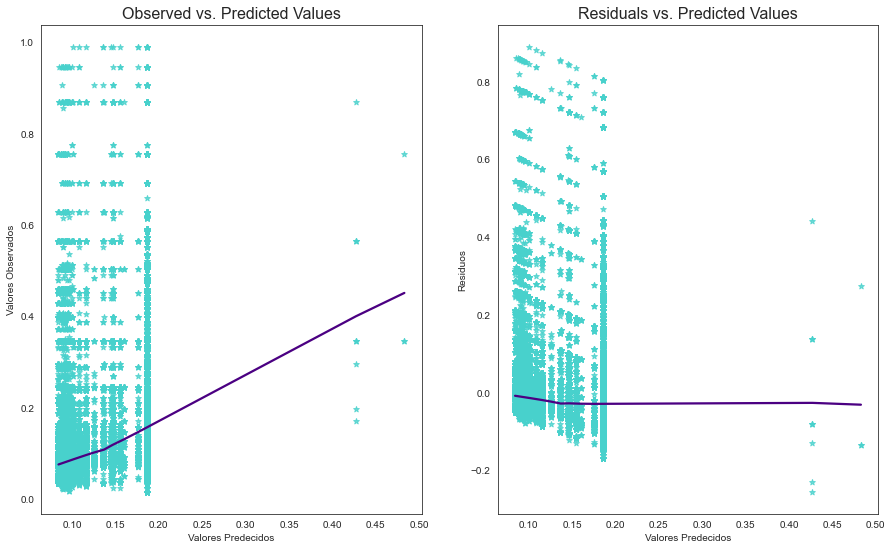

In [54]:

sns.set_style('white')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

## Desarrollamos una función que va a tener como salidas dos gráficas
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='*')
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Valores Predecidos', ylabel='Valores Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'indigo'},color = 'mediumturquoise',marker='*')
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Valores Predecidos', ylabel='Residuos')
    
linearity_test(lr4,Y_train) 

**Homocedasticidad** 


 Test de Breusch-Pagan ----
                                     value
Lagrange multiplier statistic  1903.661686
p-value                           0.000000
f-value                          58.237187
f p-value                         0.000000

 Test Goldfeld-Quandt ----
                value
F statistic  0.961409
p-value      1.000000

 Gráficos ----


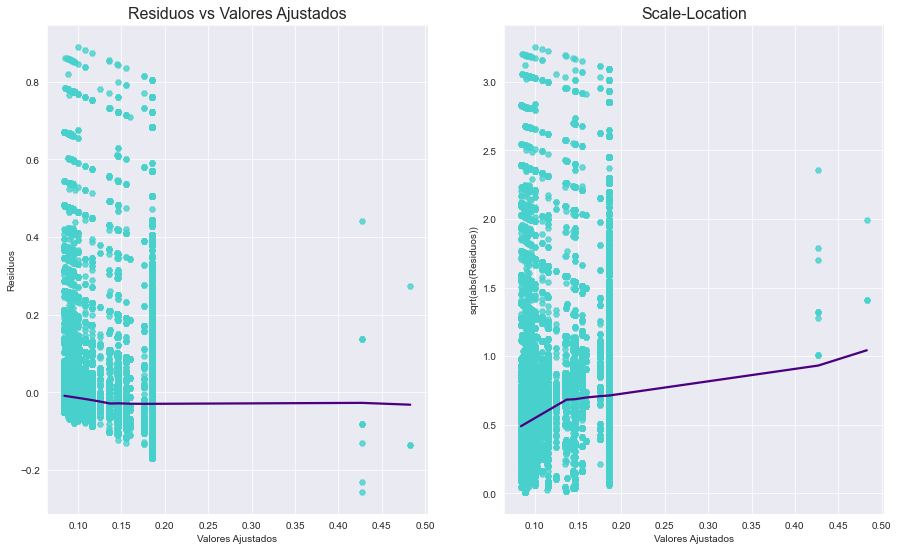

In [59]:
#Comprobamos nuestra Homocedasticidad generando una función

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='H')
    ax[0].set_title('Residuos vs Valores Ajustados', fontsize=16)
    ax[0].set(xlabel='Valores Ajustados', ylabel='Residuos')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'indigo'}, color = 'mediumturquoise', marker='H')
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Valores Ajustados', ylabel='sqrt(abs(Residuos))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Test de Breusch-Pagan ----')
    print(bp_test)
    print('\n Test Goldfeld-Quandt ----')
    print(gq_test)
    print('\n Gráficos ----')

homoscedasticity_test(lr4)

### Observen que con los P-values no podemo decir que la homocedasticidad en este caso este cumplida
### Inclusive vean como las gráficas no muestran un patrón definido en la varianza